In [14]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, convolve
from obspy import read, Trace, UTCDateTime
from scipy.io.wavfile import read
from scipy.fftpack import fft
import matplotlib.gridspec as gridspec
import os
import math
from numpy.linalg import inv
from numpy.linalg import det

c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.03926990816987242
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.07853981633974484
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.11780972450961724
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.15707963267948968
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.19634954084936207
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.2356194490192345
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.2748893571891069
c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 0.31415926535897937
c = 3, Dis

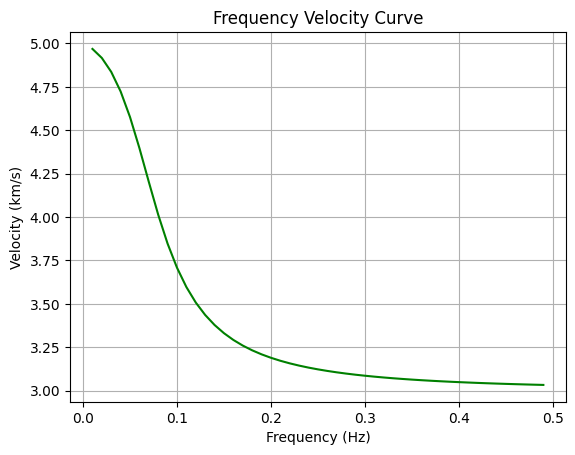

In [ ]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, convolve
from obspy import read, Trace, UTCDateTime
from scipy.io.wavfile import read
from scipy.fftpack import fft
import matplotlib.gridspec as gridspec
import os
import math
import sys
def calculate_dispersion(f, H, b1, c, b2, u1, u2):
    # Calculate the left-hand side (LHS)
    y = H * math.sqrt(1 / b1**2 - 1 / c**2)
    lhs = math.tan(2 * math.pi * f * y)

    # Check if the denominator is zero
    if b1 == 1 or c == b1:
        return "No dispersion"

    # Calculate the right-hand side (RHS)
    rhs = (u2 * math.sqrt(1 - c**2 / b2**2)) / (u1 * math.sqrt(c**2 / b1**2 - 1))

    # Compare LHS and RHS to determine dispersion
    if lhs == rhs:
        return "No dispersion"
    elif lhs < rhs:
        return "Normal dispersion"
    else:
        return "Anomalous dispersion"

def calculate_depth_kernel(f, H, b1, c, b2, u1, u2):
    # Calculate the depth kernel
    y = H * math.sqrt(1 / b1**2 - 1 / c**2)
    
    # Check if the denominator is zero
    if c == b1:
        return float('inf')
    
    depth_kernel = (2 * math.pi * f * y) / (c * math.sqrt(c**2 / b1**2 - 1))

    return depth_kernel
f_list = []
c_list = []
for i in np.arange(0.01, 0.5, 0.01):
    f = i

    H = 10  # Height
    b1 = 3  # Lower bound
    b2 = 5  # Upper bound
    d1 = 2.8 #density 1
    d2 = 3.2 #density 2
    u1 = 25.2 #d1* b1**2 # Parameter u1
    u2 = 80 #d2 * b2**2 # Parameter u2

    # Vary c in the range of b1 to b2
    c_values = []
    dispersion_values = []
    depth_kernels = []

    for c in np.arange(b1, b2):
        dispersion = calculate_dispersion(f, H, b1, c, b2, u1, u2)
        depth_kernel = calculate_depth_kernel(f, H, b1, c, b2, u1, u2)
        c_values.append(c)
        dispersion_values.append(dispersion)
        depth_kernels.append(depth_kernel)

    # Print the results
    for c, dispersion, depth_kernel in zip(c_values, dispersion_values, depth_kernels):
        print(f"c = {c}, Dispersion: {dispersion}, Depth Kernel: {depth_kernel}")

    # Calculate the values for c and LHS
    c_values = np.linspace(b1, b2, 100000)  # Changed the third argument to 'num' instead of a float value
    lhs_values = []
    for c in c_values:
        y = H * math.sqrt(1 / b1**2 - 1 / c**2)
        lhs = math.tan(2 * np.pi * f * y)
        lhs_values.append(lhs)

    #Calculate the values for c and RHS
    rhs_values = []
    for c in c_values:
        if c == b1:
            rhs_values.append(float('inf'))
        else:
            rhs = (u2 * math.sqrt(1 - c**2 / b2**2)) / (u1 * math.sqrt(c**2 / b1**2 - 1))
            rhs_values.append(rhs)

    diff =[]
    diff = np.array(rhs_values) - np.array(lhs_values)
    diff_filtered = diff[np.logical_and(diff < 0.1, diff > -0.1)]
    diff_filtered_index = np.where(diff == diff_filtered[0])
    # print(c_values[diff_filtered_index])
    diff_filtered_index_1 = np.where(diff_filtered)
    # print(c_values[diff_filtered_index_1][:2])
    #print(rhs_values[30085])
    #print(c_values[diff_filtered_index])

    f_list.append(f)
    c_list.append(c_values[diff_filtered_index])

f_list_re = np.array(f_list)
c_list_re = np.squeeze(np.array(c_list))
print(f_list_re.shape, c_list_re.shape)
print(f_list_re, c_list_re)

# Calculate the group velocity
# Calculate the derivative of c_list
dc_list = -1 * np.gradient(f_list_re, c_list_re)
dc_list_test = dc_list / (math.pi * 2)
print(dc_list_test)
print(np.array(c_list).shape, np.array(f_list).shape)    

# 0.08 [4.01367014]
# 0.15000000000000002 [3.33118331]
# 0.18000000000000002 [3.23250233]
# # 0.22 [3.15738157]
# print(f_list[7], c_list[7])
# print(f_list[14], c_list[14])
# print(f_list[17], c_list[17])
# print(f_list[21], c_list[21])

plt.plot(f_list,c_list, color='green', label='Phase Velocity')
plt.plot(dc_list_test,c_list,color='black','o',label='Group Velocity')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (km/s)")
plt.title("Frequency Velocity Curve")
plt.xlim(0, 0.4)
plt.ylim(3, 4.7)
plt.grid(True)

plt.savefig("velocity.png")

In [ ]:
def calculate_dispersion(f, H, b1, c, b2, u1, u2):
    # Calculate the left-hand side (LHS)
    y = H * math.sqrt(1 / b1**2 - 1 / c**2)
    lhs = math.tan(2 * math.pi * f * y)

    # Check if the denominator is zero
    if b1 == 1 or c == b1:
        return "No dispersion"

    # Calculate the right-hand side (RHS)
    rhs = (u2 * math.sqrt(1 - c**2 / b2**2)) / (u1 * math.sqrt(c**2 / b1**2 - 1))

    # Compare LHS and RHS to determine dispersion
    if lhs == rhs:
        return "No dispersion"
    elif lhs < rhs:
        return "Normal dispersion"
    else:
        return "Anomalous dispersion"

def calculate_depth_kernel(f, H, b1, c, b2, u1, u2):
    # Calculate the depth kernel
    y = H * math.sqrt(1 / b1**2 - 1 / c**2)
    
    # Check if the denominator is zero
    if c == b1:
        return float('inf')
    
    depth_kernel = (2 * math.pi * f * y) / (c * math.sqrt(c**2 / b1**2 - 1))

    return depth_kernel

# Define the parameters
f = 0.5  # Frequency
H = 10  # Height
b1 = 3  # Lower bound
b2 = 5  # Upper bound
d1 = 2.8 #density 1
d2 = 3.2 #density 2
u1 = 25.2 #d1* b1**2 # Parameter u1
u2 = 80 #d2 * b2**2 # Parameter u2

for i in range(1,100):
    ref = 0.01*i
    b1_ref = b1 + ref
    b2_ref = b2 + ref

c_values = []
dispersion_values = []
depth_kernels = []

for c in range(b1, b2+1):
    dispersion = calculate_dispersion(f, H, b1, c, b2, u1, u2)
    depth_kernel = calculate_depth_kernel(f, H, b1, c, b2, u1, u2)
    c_values.append(c)
    dispersion_values.append(dispersion)
    depth_kernels.append(depth_kernel)

# Print the results
for c, dispersion, depth_kernel in zip(c_values, dispersion_values, depth_kernels):
    print(f"c = {c}, Dispersion: {dispersion}, Depth Kernel: {depth_kernel}")

# Calculate the values for c and LHS
c_values = np.linspace(b1, b2, 50000)  # Changed the third argument to 'num' instead of a float value
lhs_values = []
for c in c_values:
    y = H * math.sqrt(1 / b1**2 - 1 / c**2)
    lhs = math.tan(2 * np.pi * f * y)
    lhs_values.append(lhs)

#Calculate the values for c and RHS
rhs_values = []
for c in c_values:
    if c == b1:
        rhs_values.append(float('inf'))
    else:
        rhs = (u2 * math.sqrt(1 - c**2 / b2**2)) / (u1 * math.sqrt(c**2 / b1**2 - 1))
        rhs_values.append(rhs)

diff =[]
diff = np.array(rhs_values) - np.array(lhs_values)
diff_filtered = diff[np.logical_and(diff < 0.1, diff > -0.001)]
diff_filtered_index = np.where(diff == diff_filtered[0])
print(c_values[diff_filtered_index], diff_filtered_index)
diff_filtered_index_1 = np.where(diff_filtered)
print(c_values[diff_filtered_index_1][:2])
print(diff_filtered[:5])
print(rhs_values[795])
#print(c_values[diff_filtered_index])

c = 3, Dispersion: No dispersion, Depth Kernel: inf
c = 4, Dispersion: Normal dispersion, Depth Kernel: 1.963495408493621
c = 5, Dispersion: Normal dispersion, Depth Kernel: 1.2566370614359172
[3.03180064] (array([795]),)
[3.      3.00004]
[0.0812518  0.09373925 0.08745913 0.08116583 0.07485931]
17.291804141817074


SyntaxError: invalid syntax (1289208470.py, line 2)

In [16]:
#C_dis1= 3000->3010
#C_dis2= 5000->5010

C_ref = np.array([4013.67014,3331.18331,3232.50233,3157.38157])
C_dis1 = np.array([4028.55189,3344.18404,3244.66315,3168.86329])
C_dis2 = np.array([4015.62296,3331.33171,3232.57943,3157.40467])
layer1 = C_dis1 - C_ref 
layer2 = C_dis2 - C_ref 
print(layer1, layer2)

G = np.zeros([4, 2])
d = np.zeros([4, 1])
m = np.zeros([2, 1])
G[:,0] = layer1
G[:,1] = layer2
print('G =',G)

C_obs = [4130,3529,3427,3346]
d = []
for n in range(len(C_obs)):
    d.append(C_obs[n] - C_ref[n])
d = np.array(d)

GT = np.transpose(G)
GTG = GT.dot(G)
GTG_inv = np.linalg.inv(GTG)
print('d =',d)
GTd = GT.dot(d)
m = GTG_inv.dot(GTd)
e = d - G.dot(m)
eT = np.transpose(e)
eTe = eT.dot(e)
print('m =',m)
print('e =',e)
print('E =',eTe)

[14.88175 13.00073 12.16082 11.48172] [1.95282 0.1484  0.0771  0.0231 ]
G = [[14.88175  1.95282]
 [13.00073  0.1484 ]
 [12.16082  0.0771 ]
 [11.48172  0.0231 ]]
d = [116.32986 197.81669 194.49767 188.61843]
m = [ 16.28750669 -64.67244336]
e = [ 0.23689813 -4.33539628  1.41447826  3.10377211]
E = 30.48593165231372
